# Webinar 3 - Parts of Speech Tagging with HMM

In this jupyter notebook, We will go through 4 different topics:
1. **Parts of Speech Tagging**
2. **Lookup Table**
3. **Bigrams**
4. **Hidden Markov Models (HMM) in Speech Tagging (Warmup)**

<hr>

## 1. Parts of Speech Tagging

In parts of speech tagging we want to figure out which words are nouns, verbs, adjectives, adverbs, etc. So we want to label or tag each words in a given sentence. The labels are called parts of speech and the problem itself is called parts of speech tagging.

In this part you will learn more about Parts of speech tagging (POS) using NLTK. Later on you will build POS using Hidden Markov Model (HMM).

In [1]:
# Importing the libraries
import nltk
import IPython
import re

In [2]:
# Sample text
text = "As I was waiting, a man came out of a side room, and at a glance I was sure he must be Long John."

Before getting the parts of speech of our text, We need to preprocess our text:

In [3]:
# Lower case
text = text.lower()

# remove punctuation
text = re.sub(r"[^a-zA-Z0-9]", " ", text)

# Tokenizing
text = text.split()
print("Preprocessed text: \n", text)

Preprocessed text: 
 ['as', 'i', 'was', 'waiting', 'a', 'man', 'came', 'out', 'of', 'a', 'side', 'room', 'and', 'at', 'a', 'glance', 'i', 'was', 'sure', 'he', 'must', 'be', 'long', 'john']


In [4]:
# Parts of speech tagging using NLTK
nltk.pos_tag(text)

[('as', 'IN'),
 ('i', 'NN'),
 ('was', 'VBD'),
 ('waiting', 'VBG'),
 ('a', 'DT'),
 ('man', 'NN'),
 ('came', 'VBD'),
 ('out', 'IN'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('side', 'NN'),
 ('room', 'NN'),
 ('and', 'CC'),
 ('at', 'IN'),
 ('a', 'DT'),
 ('glance', 'NN'),
 ('i', 'NN'),
 ('was', 'VBD'),
 ('sure', 'JJ'),
 ('he', 'PRP'),
 ('must', 'MD'),
 ('be', 'VB'),
 ('long', 'JJ'),
 ('john', 'NN')]

**Resources:**
1. <a href="https://medium.com/@gianpaul.r/tokenization-and-parts-of-speech-pos-tagging-in-pythons-nltk-library-2d30f70af13b">Tokenization and Parts of Speech(POS) Tagging in Python’s NLTK library</a> - Medium Post
2. <a href="https://www.nltk.org/book/ch05.html">Categorizing and Tagging Words</a> - NLTK official
3. <a href="https://en.wikipedia.org/wiki/Part-of-speech_tagging">Part-of-speech tagging</a> - Wikipedia.com

<hr>

## 2. Lookup Table

In our lookup table, We will go through each word in our dataset and count their POS. Then we will put each of the corresponding values into our table.

<img src="./assets/lookup.png">

In [1]:
# Importing the libraries
import re
import numpy as np
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize

In [2]:
# Sample text and its corresponding labels
text = ["Mary saw Jane.",
        "Jane saw Will."]
print(text)

labels = ["noun verb noun",
          "noun verb noun"]
print(labels)

['Mary saw Jane.', 'Jane saw Will.']
['noun verb noun', 'noun verb noun']


In [3]:
# Preprocessing text
def preprocess(text_list, labels):
    # Converting the list of sentences into one string
    text = " ".join(text_list)
    # Convert to lowercase
    text = text.lower()
    # Removing punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # Tokenize the words
    tokens = word_tokenize(text)

    # Converting the list of labels into one string
    labels = " ".join(labels)
    labels = word_tokenize(labels)
    
    return tokens, labels

tokens, labels = preprocess(text, labels)
print("Tokens: \n", tokens, "\n")
print("Labels: \n", labels)

Tokens: 
 ['mary', 'saw', 'jane', 'jane', 'saw', 'will'] 

Labels: 
 ['noun', 'verb', 'noun', 'noun', 'verb', 'noun']


In [4]:
# Count function
def count(tokens, labels):
    # Initialize Counter
    cnt = Counter()
    # Iterating through tokens and labels
    for i_word, i_label in zip(tokens, labels):
        # If word and label are inside counter
        if (i_word, i_label) not in cnt:
            cnt[(i_word, i_label)] = 1
        # If word and label are not inside counter
        else:
            cnt[(i_word, i_label)] += 1
    return cnt

cnt = count(tokens, labels)
cnt

Counter({('mary', 'noun'): 1,
         ('saw', 'verb'): 2,
         ('jane', 'noun'): 2,
         ('will', 'noun'): 1})

In [5]:
# Initializing zeros data frame
df = pd.DataFrame(np.zeros((len(np.unique(tokens)), len(np.unique(labels)))))
# Changing the column names
df.columns = list(np.unique(labels))
# Changing the index names
df.index = list(np.unique(tokens))

df

,noun,verb
jane,0.0,0.0
mary,0.0,0.0
saw,0.0,0.0
will,0.0,0.0


In [6]:
# Updating the values in our dataframe
for i in list(cnt.items()):
    # Get the corresponding word
    word = i[0][0]
    # Get the corresponding lable
    label = i[0][1]
    # Update
    df[label][word] = i[1]
    
df

,noun,verb
jane,2.0,0.0
mary,1.0,0.0
saw,0.0,2.0
will,1.0,0.0


**Resources:**

1. <a href="https://codeburst.io/python-basics-11-word-count-filter-out-punctuation-dictionary-manipulation-and-sorting-lists-3f6c55420855">Python Word Count (Filter out Punctuation, Dictionary Manipulation, and Sorting Lists)</a> - Medium Post

<hr>

## 3. Bigrams 

A **bigram** is a sequence of two adjacent elements from a string of tokens, which are typically letters, syllables, or words. A bigram is an n-gram for n=2. The frequency distribution of every bigram in a string is commonly used for simple statistical analysis of text in many applications, including in computational linguistics, cryptography, speech recognition, and so on. (Wikipedia)

In here you will learn do create a bigram count table:

<img src="./assets/bigrams.png">

In [93]:
# Import the libraries
import re
from collections import Counter
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

In [95]:
# Get the sample text
text = ["Mary will see Jane.",
        "Will will see Mary.",
        "Jane will see Will."]
print("Text: \n", text, "\n")

# Get the lable
labels = ["noun modal verb noun",
         "noun modal verb noun",
         "noun modal verb noun"]
print("Label: \n", labels)

Text: 
 ['Mary will see Jane.', 'Will will see Mary.', 'Jane will see Will.'] 

Label: 
 ['noun modal verb noun', 'noun modal verb noun', 'noun modal verb noun']


In [96]:
# Preprocessing text
def preprocess(text_list, labels):
    # Converting the list of sentences into one string
    text = " ".join(text_list)
    # Convert to lowercase
    text = text.lower()
    # Removing punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # Tokenize the words
    tokens = word_tokenize(text)

    # Converting the list of labels into one string
    labels = " ".join(labels)
    labels = word_tokenize(labels)
    
    return tokens, labels

tokens, labels = preprocess(text, labels)
print("Tokens: \n", tokens, "\n")
print("Labels: \n", labels)

Tokens: 
 ['mary', 'will', 'see', 'jane', 'will', 'will', 'see', 'mary', 'jane', 'will', 'see', 'will'] 

Labels: 
 ['noun', 'modal', 'verb', 'noun', 'noun', 'modal', 'verb', 'noun', 'noun', 'modal', 'verb', 'noun']


In [97]:
# Bigram function
def bigram(tokens):
    bigrams = list(nltk.bigrams(tokens))
    return bigrams

tokens_bigram = bigram(tokens)
labels_bigram = bigram(labels)
print("Tokens bigram: \n", tokens_bigram, "\n")
print("Labels bigram: \n", labels_bigram)

Tokens bigram: 
 [('mary', 'will'), ('will', 'see'), ('see', 'jane'), ('jane', 'will'), ('will', 'will'), ('will', 'see'), ('see', 'mary'), ('mary', 'jane'), ('jane', 'will'), ('will', 'see'), ('see', 'will')] 

Labels bigram: 
 [('noun', 'modal'), ('modal', 'verb'), ('verb', 'noun'), ('noun', 'noun'), ('noun', 'modal'), ('modal', 'verb'), ('verb', 'noun'), ('noun', 'noun'), ('noun', 'modal'), ('modal', 'verb'), ('verb', 'noun')]


In [98]:
# Count the bigrams
def bigram_count(tokens, labels):
    # Initialize Counter
    cnt = Counter()
    # Iterating through tokens and labels
    for i_word, i_label in zip(tokens, labels):
        # If word and label are inside counter
        if (i_word, i_label) not in cnt:
            cnt[(i_word, i_label)] = 1
        # If word and label are not inside counter
        else:
            cnt[(i_word, i_label)] += 1
    return cnt

bigram_count = bigram_count(tokens_bigram, labels_bigram)
bigram_count

Counter({(('mary', 'will'), ('noun', 'modal')): 1,
         (('will', 'see'), ('modal', 'verb')): 3,
         (('see', 'jane'), ('verb', 'noun')): 1,
         (('jane', 'will'), ('noun', 'noun')): 1,
         (('will', 'will'), ('noun', 'modal')): 1,
         (('see', 'mary'), ('verb', 'noun')): 1,
         (('mary', 'jane'), ('noun', 'noun')): 1,
         (('jane', 'will'), ('noun', 'modal')): 1,
         (('see', 'will'), ('verb', 'noun')): 1})

In [99]:
# Converting words from ('mary', 'will') format to mary-will format
words_names = ["-".join(i[0][0]) for i in list(bigram_count.items())]
print("words names: \n", words_names, "\n")

# Converting labels from ('noun', 'modal') format to noun-modal format
labels_names = ["-".join(i[0][1]) for i in list(bigram_count.items())]
print("labels names: \n", labels_names)

words names: 
 ['mary-will', 'will-see', 'see-jane', 'jane-will', 'will-will', 'see-mary', 'mary-jane', 'jane-will', 'see-will'] 

labels names: 
 ['noun-modal', 'modal-verb', 'verb-noun', 'noun-noun', 'noun-modal', 'verb-noun', 'noun-noun', 'noun-modal', 'verb-noun']


In [100]:
# Initializing zeros data frame
df = pd.DataFrame(np.zeros((len(np.unique(words_names)), len(np.unique(labels_names)))))
# Changing the column names
df.columns = np.unique(labels_names)
# Changing the index names
df.index = np.unique(words_names)

df

,modal-verb,noun-modal,noun-noun,verb-noun
jane-will,0.0,0.0,0.0,0.0
mary-jane,0.0,0.0,0.0,0.0
mary-will,0.0,0.0,0.0,0.0
see-jane,0.0,0.0,0.0,0.0
see-mary,0.0,0.0,0.0,0.0
see-will,0.0,0.0,0.0,0.0
will-see,0.0,0.0,0.0,0.0
will-will,0.0,0.0,0.0,0.0


In [101]:
# Updating the values in our dataframe
for i in zip(bigram_count.items()):
    # Get the corresponding word
    word = "-".join(i[0][0][0])
    # Get the corresponding lable
    label = "-".join(i[0][0][1])
    # Update
    df[label][word] = i[0][1]
    
df

,modal-verb,noun-modal,noun-noun,verb-noun
jane-will,0.0,1.0,1.0,0.0
mary-jane,0.0,0.0,1.0,0.0
mary-will,0.0,1.0,0.0,0.0
see-jane,0.0,0.0,0.0,1.0
see-mary,0.0,0.0,0.0,1.0
see-will,0.0,0.0,0.0,1.0
will-see,3.0,0.0,0.0,0.0
will-will,0.0,1.0,0.0,0.0


**Resources:**
1. <a href="https://www.quora.com/What-is-a-bigram-and-a-trigram-layman-explanation-please">What is a bigram and a trigram?</a> - Quora.com
1. <a href="https://en.wikipedia.org/wiki/Bigram">Bigram</a> - Wikipedia.com
2. <a href="https://www.tutorialspoint.com/python/python_bigrams.htm">Python - Bigrams</a> - tutorialspoint.com

<hr>

## 4. Hidden Markov Models (HMM) in Speech Tagging (Warmup)

Part of speech tagging is the process of determining the syntactic category of a word from the words in its surrounding context. It is often used to help disambiguate natural language phrases because it can be done quickly with high accuracy. In this example we will build the example in the below image.

<img src="assets/hmm.png">

In [1]:
# Importing the libraries
import numpy as np
import re
import matplotlib.pyplot as plt
import pomegranate
from helpers import show_model

In [2]:
# Initiaize the Hidden Markov Model (HMM)
model = pomegranate.HiddenMarkovModel()

Not let's say that we have the following **emission probabilities**. In this example, We will use same example as in course videos.
<img width="800px" src="assets/emission.png">

In [3]:
### Emission probabilities

# "Noun" emission and state
emission_noun = pomegranate.DiscreteDistribution({"mary": 4/9, 
                                                  "jane": 2/9, 
                                                  "will": 1/9, 
                                                  "spot": 2/9, 
                                                  "can": 0, 
                                                  "see": 0, 
                                                  "pat": 0})
state_noun = pomegranate.State(emission_noun, name = "noun")

# "Modal" emission and state
emission_modal = pomegranate.DiscreteDistribution({"mary": 0, 
                                                  "jane": 0, 
                                                  "will": 3/4, 
                                                  "spot": 0, 
                                                  "can": 1/4, 
                                                  "see": 0, 
                                                  "pat": 0})
state_modal = pomegranate.State(emission_noun, name = "modal")

# "Verb" emission and state
emission_verb = pomegranate.DiscreteDistribution({"mary": 0, 
                                                  "jane": 0, 
                                                  "will": 0, 
                                                  "spot": 1/4, 
                                                  "can": 0, 
                                                  "see": 1/2, 
                                                  "pat": 1/4})
state_verb = pomegranate.State(emission_noun, name = "verb")

In [4]:
# Add the states into our HMM model
model.add_states(state_noun, state_modal, state_verb)

Now consider the following **transition probabilities**. Add these transitions between your states.

<img width="800px" src="assets/transition.png">

In [5]:
### Transition probabilities

# Transition probabilities from "<S>" to "noun", "modal", "verb"
model.add_transition(model.start, state_noun, 3/4)
model.add_transition(model.start, state_modal, 1/4)
model.add_transition(model.start, state_verb, 0)

# Transition probabilities from "noun" to "noun", modal", "verb"
model.add_transition(state_noun, state_noun, 1/9)
model.add_transition(state_noun, state_modal, 1/3)
model.add_transition(state_noun, state_verb, 1/9)

# Transition probabilities from "modal" to "noun", modal", "verb"
model.add_transition(state_modal, state_noun, 1/4)
model.add_transition(state_modal, state_modal, 0)
model.add_transition(state_modal, state_verb, 3/4)

# Transition probabilities from "verb" to "noun", modal", "verb"
model.add_transition(state_verb, state_noun, 1)
model.add_transition(state_verb, state_modal, 0)
model.add_transition(state_verb, state_verb, 0)

# Transition probabilities from "noun", modal", "verb" to "<E>" 
model.add_transition(state_noun, model.end, 4/9)
model.add_transition(state_modal, model.end, 0)
model.add_transition(state_verb, model.end, 0)

In [6]:
# Finalize the model
model.bake()

In [7]:
# Get total number of edges and nodes
print("Total number of edges: ", model.edge_count())
print("Total number of states or nodes: ", model.node_count())

Total number of edges:  15
Total number of states or nodes:  5


In [8]:
# Changing "None-end" to "end"
model.states[-1].name = "<E>"

# Changing "None-end" to "end"
model.states[-2].name = "<S>"

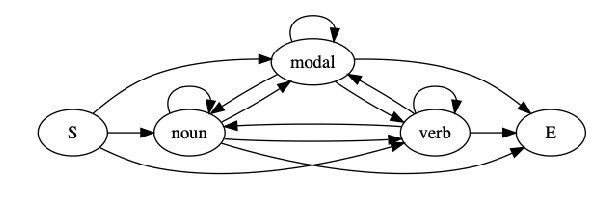

In [9]:
# Visualize the model
show_model(model, figsize=(10, 12), filename="transition.png", overwrite=True, show_ends=True)

Now let's start by predicting the parts of speech of the following text.

In [17]:
# Sample text
text = "Jane will spot Will."
print(text)

Jane will spot Will.


In [11]:
### Preprocessing the text

# Lower case
text = text.lower()

# remove punctuation
text = re.sub(r"[^a-zA-Z0-9]", " ", text)

# Tokenizing
text = text.split()
print("Preprocessed text: \n", text)

Preprocessed text: 
 ['jane', 'will', 'spot', 'will']


In [16]:
### Prediction
viterbi_likelihood, viterbi_path = model.viterbi(text)

# Get the final viterbi path
viterbi_path = [i_state[1].name for i_state in viterbi_path]

print("The most likely sequence: \n", viterbi_path, "\n")
#print("With likelihood of (approximate):\n {:.3f}%".format(np.exp(viterbi_likelihood)*100))

The most likely sequence: 
 ['<S>', 'noun', 'modal', 'verb', 'noun', '<E>'] 



As you can see, We could successfully, Predict our POS for the sentence "Jane will spot Will."

<img src="assets/hmm_exp.png">

**Resources:**
1. <a href="https://towardsdatascience.com/part-of-speech-tagging-with-hidden-markov-chain-models-e9fccc835c0e">Part of Speech Tagging with Hidden Markov Chain Models</a> - Medium Post
2. <a href="https://web.stanford.edu/~jurafsky/slp3/A.pdf">Hidden Markov Models</a> - Speech and Language Processing Textbook

<hr>

**Notes:**

<a href="https://www.evernote.com/l/AkUoRUE3ckRAC51wKTE0bkfc18kDyHCrHTo">Parts of Speech Tagging (POS) with Hidden Markov Model (HMM)</a>